In [ ]:
## SIMPLE AUTOENCODER
##import all the dependencies
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
encoding_dim = 15
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

In [ ]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


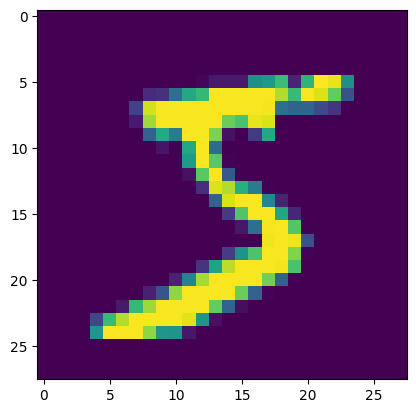

In [ ]:
plt.imshow(x_train[0].reshape(28,28))

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.4210 - val_loss: 0.2272
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2141 - val_loss: 0.1841
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1805 - val_loss: 0.1655
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1638 - val_loss: 0.1544
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1539 - val_loss: 0.1481
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1490 - val_loss: 0.1449
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1459 - val_loss: 0.1427
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1437 - val_loss: 0.1407
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1416 - val_loss: 0.1390
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1402 - val_loss: 0.1376
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1387 - val_loss: 0.1363
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


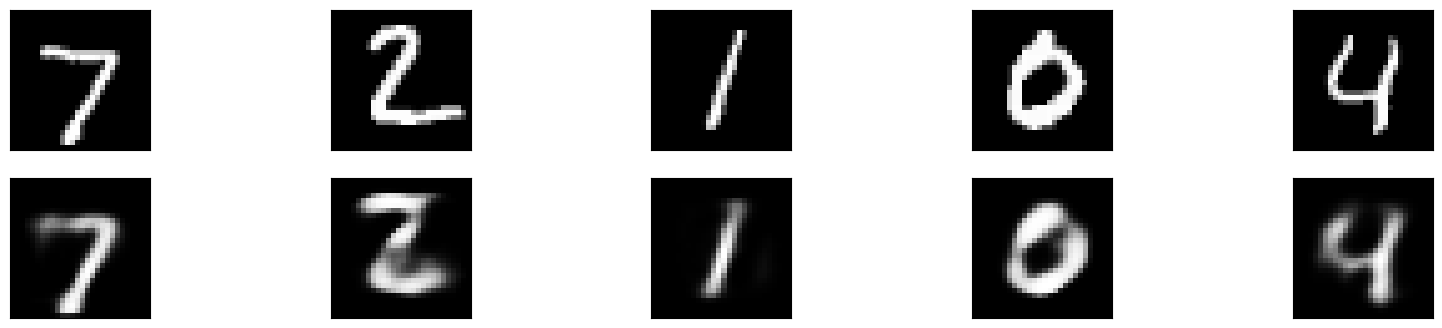

In [ ]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()